In [9]:
import numpy as np
import torch
import gpytorch
import matplotlib.pyplot as plt
from gpRegressors import MostLikelyHeteroGP

In [2]:
pair = np.load('./input_data.npy')

N = pair[0].shape[0]

In [4]:
x_tr,y_tr = torch.from_numpy(pair[0]).float().to('cuda:0'), torch.from_numpy(pair[1]).to('cuda:0').float()
x_tr, y_tr = x_tr.view(-1,1), y_tr.view(-1,1)

In [6]:
mlhgp = MostLikelyHeteroGP(
                        x_tr=x_tr,
                        y_tr=y_tr,
                        max_iter=100)

initializing the homoskedastic GP.


In [7]:
def plot_gp(test_x, posterior_f_vals, posterior_targets):
    
    # get the conditional mean and upper,lower confidence
    # for both the posterior (uncertainty about the parameters)
    # and the targets (uncertainty due to parameters and noise)
    mean_low, mean_up = posterior_f_vals.confidence_region()
    pred_mean = posterior_targets.mean
    lower, upper = posterior_targets.confidence_region()
    plt.plot(x_tr.cpu().detach().numpy(), y_tr.cpu().detach().numpy(), 'o', fillstyle='none', markersize=4)
    # Plot predictive means as blue line
    plt.plot(test_x.cpu().detach().numpy(), pred_mean.cpu().detach().numpy(), 'b')
    # Plot confidence bounds as lightly shaded region
    plt.fill_between(test_x.cpu().detach().numpy(),
                     mean_low.cpu().detach().numpy().ravel(),
                     mean_up.cpu().detach().numpy().ravel(),
                     alpha=0.35,
                     color='b')
    plt.fill_between(test_x.cpu().detach().numpy(),
                     lower.cpu().detach().numpy().ravel(),
                     upper.cpu().detach().numpy().ravel(),
                     alpha=0.25,
                     color='royalblue')
    plt.legend(['Mean', 'Observed Data', 'Posterior Confidence',
               'Posterior Predictive Confidence'])
    plt.xlabel('X')
    plt.ylabel('Y')
    
    plt.show()

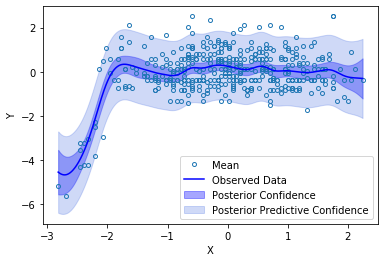

fitting hetero model at step  0
success, replacing old MLL.


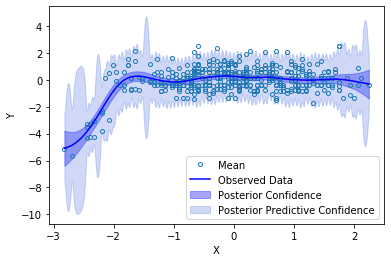

fitting hetero model at step  1
success, replacing old MLL.
fitting hetero model at step  2
success, replacing old MLL.
fitting hetero model at step  3
success, replacing old MLL.
fitting hetero model at step  4
aborted training. category must be a Warning subclass, not 'RuntimeError'


TypeError: category must be a Warning subclass, not 'RuntimeError'

In [10]:
# see the initial homoskedastic GP
plot_gp(*mlhgp.visualize_predicitions())

N = 100

for i in range(N):
    mlhgp.train(1)
    if not i%10:
        plot_gp(*mlhgp.visualize_predicitions())